In [1]:
import tensorflow as tf
import cv2
import numpy as np
from skimage import transform

102973440/102967424 [==============================] - 1s 0us/step
Epoch 1/20
34/34 [==============================] - 5s 152ms/step - loss: 5.0131 - acc: 0.0000e+00 - val_loss: 4.2514 - val_acc: 0.0000e+00
Epoch 2/20
34/34 [==============================] - 4s 112ms/step - loss: 3.5569 - acc: 0.0000e+00 - val_loss: 2.8264 - val_acc: 0.0037
Epoch 3/20
34/34 [==============================] - 4s 113ms/step - loss: 2.2059 - acc: 0.8898 - val_loss: 1.5908 - val_acc: 1.0000
Epoch 4/20
34/34 [==============================] - 4s 113ms/step - loss: 1.1600 - acc: 1.0000 - val_loss: 0.7825 - val_acc: 1.0000
Epoch 5/20
34/34 [==============================] - 4s 113ms/step - loss: 0.5747 - acc: 1.0000 - val_loss: 0.4060 - val_acc: 1.0000
Epoch 6/20
34/34 [==============================] - 4s 114ms/step - loss: 0.3185 - acc: 1.0000 - val_loss: 0.2452 - val_acc: 1.0000
Epoch 7/20
34/34 [==============================] - 4s 114ms/step - loss: 0.2038 - acc: 1.0000 - val_loss: 0.1671 - val_acc: 1.00

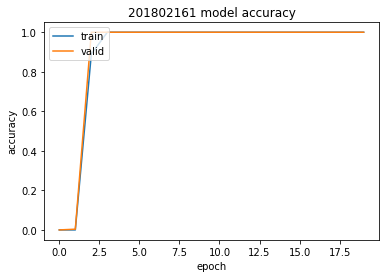

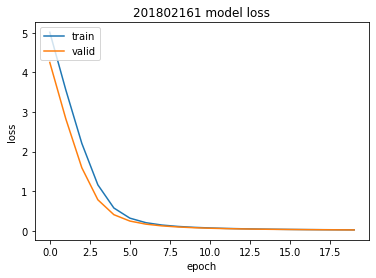

5/5 [==============================] - 1s 132ms/step - loss: 0.0213 - acc: 1.0000
test accuracy
1.0


In [2]:
# Fully Connected Layer 하나만 학습
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
resized_xtrain = np.zeros((1350,224,224,3))
for i in range (1350):
    resized_xtrain[i] = transform.resize(x_train[i], (224, 224, 3), order=1, mode='reflect')
resized_xtest = np.zeros((150,224,224,3))
for i in range (150):
    resized_xtest[i] = transform.resize(x_test[i], (224, 224, 3), order=1, mode='reflect')
resized_ytrain = np.zeros((1350,1))
for i in range (1350):
    resized_ytrain[i] = transform.resize(y_train[i], (1, ), order=1, mode='reflect')
resized_ytest = np.zeros((150,1))
for i in range (150):
    resized_ytest[i] = transform.resize(y_test[i], (1, ), order=1, mode='reflect')


base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224,224,3))
# base_model.summary()
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)

base_model.trainable = False # 이미 학습 되어있으므로 추가 학습 시키지 않는다
x = base_model.output
pred = tf.keras.layers.Dense(100, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

from sklearn.model_selection import train_test_split

resized_xtrain, x_valid, resized_ytrain, y_valid = train_test_split(resized_xtrain, resized_ytrain, test_size=0.2, random_state=123)

resized_ytrain = tf.squeeze(tf.one_hot(resized_ytrain, 100), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
resized_ytest = tf.squeeze(tf.one_hot(resized_ytest, 100), axis=1)

history = model.fit(x=resized_xtrain, y=resized_ytrain, batch_size=32, epochs=20, validation_data=(x_valid, y_valid))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('201802161 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('201802161 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

results = model.evaluate(resized_xtest, resized_ytest, batch_size=32)

print('test accuracy')
print(results[1])

102973440/102967424 [==============================] - 1s 0us/step
0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f12e54b74a8>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f12e4a0f9e8>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f12e4a0fda0>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f12e47d20b8>
4 <tensorflow.python.keras.layers.core.Activation object at 0x7f12e47d2898>
5 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f12e47d2588>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f12d072f828>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f12d073bfd0>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f12d0759e10>
9 <tensorflow.python.keras.layers.core.Activation object at 0x7f12d075fd30>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f12d075fba8>
11 <t

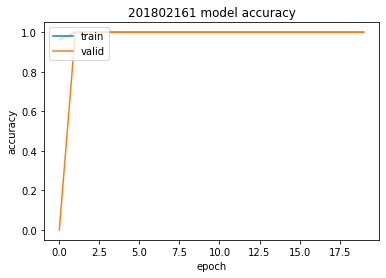

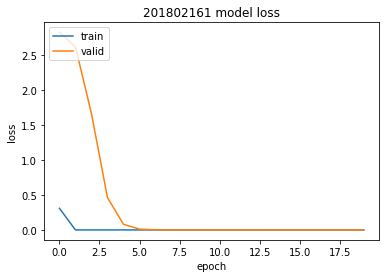

5/5 [==============================] - 0s 74ms/step - loss: 7.3981e-06 - acc: 1.0000
test accuracy
1.0


In [2]:
# # 일부분을 다시 학습

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
# resized_xtrain = np.zeros((1350,224,224,3))
# for i in range (1350):
#     resized_xtrain[i] = transform.resize(x_train[i], (224, 224, 3), order=1, mode='reflect')
# resized_xtest = np.zeros((150,224,224,3))
# for i in range (150):
#     resized_xtest[i] = transform.resize(x_test[i], (224, 224, 3), order=1, mode='reflect')
# resized_ytrain = np.zeros((1350,1))
# for i in range (1350):
#     resized_ytrain[i] = transform.resize(y_train[i], (1, ), order=1, mode='reflect')
# resized_ytest = np.zeros((150,1))
# for i in range (150):
#     resized_ytest[i] = transform.resize(y_test[i], (1, ), order=1, mode='reflect')


# base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224,224,3))
# # base_model.summary()
# base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)

# x = base_model.output
# pred = tf.keras.layers.Dense(100, activation='softmax')(x)
# model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

# for layer in model.layers:
#   layer.trainable = True

# for idx, layer in enumerate(model.layers):
#   print(idx, layer)
#   if idx < 100:
#     layer.trainable = False

# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

# from sklearn.model_selection import train_test_split

# resized_xtrain, x_valid, resized_ytrain, y_valid = train_test_split(resized_xtrain, resized_ytrain, test_size=0.2, random_state=123)

# resized_ytrain = tf.squeeze(tf.one_hot(resized_ytrain, 100), axis=1)
# y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
# resized_ytest = tf.squeeze(tf.one_hot(resized_ytest, 100), axis=1)

# results = model.evaluate(resized_xtest, resized_ytest, batch_size=32)

# print('test accuracy')
# print(results[1])

# history = model.fit(x=resized_xtrain, y=resized_ytrain, batch_size=32, epochs=20, validation_data=(x_valid, y_valid))

# import matplotlib.pyplot as plt

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('201802161 model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'valid'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('201802161 model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'valid'], loc='upper left')
# plt.show()

# results = model.evaluate(resized_xtest, resized_ytest, batch_size=32)

# print('test accuracy')
# print(results[1])

5/5 [==============================] - 1s 124ms/step - loss: 6.0149 - acc: 0.0000e+00
test accuracy
0.0
Epoch 1/20
34/34 [==============================] - 12s 342ms/step - loss: 1.1119 - acc: 0.8074 - val_loss: 1.0587e-05 - val_acc: 1.0000
Epoch 2/20
34/34 [==============================] - 11s 318ms/step - loss: 7.8128e-04 - acc: 1.0000 - val_loss: 5.8180e-04 - val_acc: 1.0000
Epoch 3/20
34/34 [==============================] - 11s 320ms/step - loss: 2.7222e-04 - acc: 1.0000 - val_loss: 0.2599 - val_acc: 1.0000
Epoch 4/20
34/34 [==============================] - 11s 322ms/step - loss: 2.0562e-04 - acc: 1.0000 - val_loss: 1.5657 - val_acc: 1.0000
Epoch 5/20
34/34 [==============================] - 11s 322ms/step - loss: 1.6438e-04 - acc: 1.0000 - val_loss: 1.8256 - val_acc: 1.0000
Epoch 6/20
34/34 [==============================] - 11s 322ms/step - loss: 1.3701e-04 - acc: 1.0000 - val_loss: 1.7648 - val_acc: 1.0000
Epoch 7/20
34/34 [==============================] - 11s 325ms/step - l

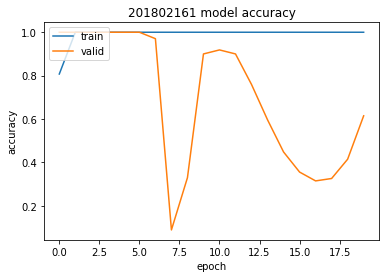

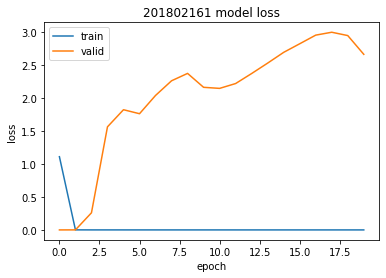

5/5 [==============================] - 0s 72ms/step - loss: 2.4801 - acc: 0.6533
test accuracy
0.653333306312561


In [2]:
# # 전체를 다시 학습
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
# resized_xtrain = np.zeros((1350,224,224,3))
# for i in range (1350):
#     resized_xtrain[i] = transform.resize(x_train[i], (224, 224, 3), order=1, mode='reflect')
# resized_xtest = np.zeros((150,224,224,3))
# for i in range (150):
#     resized_xtest[i] = transform.resize(x_test[i], (224, 224, 3), order=1, mode='reflect')
# resized_ytrain = np.zeros((1350,1))
# for i in range (1350):
#     resized_ytrain[i] = transform.resize(y_train[i], (1, ), order=1, mode='reflect')
# resized_ytest = np.zeros((150,1))
# for i in range (150):
#     resized_ytest[i] = transform.resize(y_test[i], (1, ), order=1, mode='reflect')


# base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224,224,3))
# # base_model.summary()
# base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)

# x = base_model.output
# pred = tf.keras.layers.Dense(100, activation='softmax')(x)
# model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

# from sklearn.model_selection import train_test_split

# resized_xtrain, x_valid, resized_ytrain, y_valid = train_test_split(resized_xtrain, resized_ytrain, test_size=0.2, random_state=123)

# resized_ytrain = tf.squeeze(tf.one_hot(resized_ytrain, 100), axis=1)
# y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
# resized_ytest = tf.squeeze(tf.one_hot(resized_ytest, 100), axis=1)

# results = model.evaluate(resized_xtest, resized_ytest, batch_size=32)

# print('test accuracy')
# print(results[1])

# history = model.fit(x=resized_xtrain, y=resized_ytrain, batch_size=32, epochs=20, validation_data=(x_valid, y_valid))

# import matplotlib.pyplot as plt

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('201802161 model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'valid'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('201802161 model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'valid'], loc='upper left')
# plt.show()

# results = model.evaluate(resized_xtest, resized_ytest, batch_size=32)

# print('test accuracy')
# print(results[1])